In [40]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
# read titanic training & test csv files as a pandas DataFrame
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [42]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [43]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [45]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [46]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
train_df.describe(percentiles=[.25, .5, .75])
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# Sibling distribution `[.65, .7]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hosono, Mr. Masabumi",male,1601,B96 B98,S
freq,1,577,7,4,644


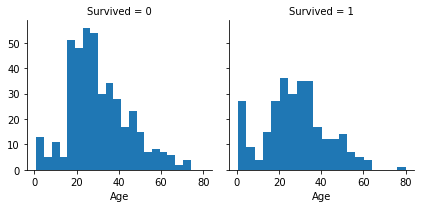

In [49]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

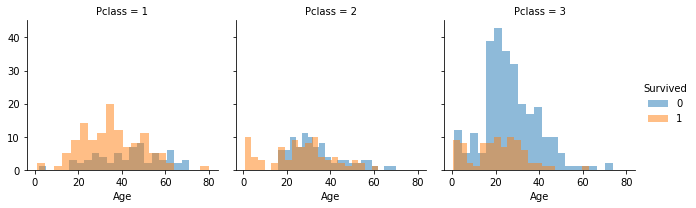

In [50]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


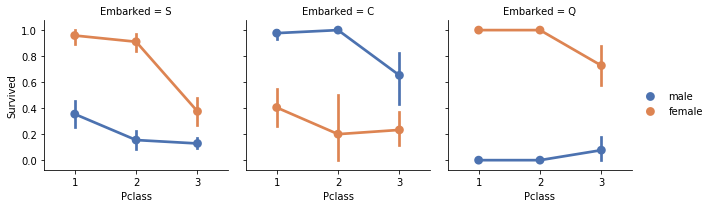

In [51]:
grid = sns.FacetGrid(train_df, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


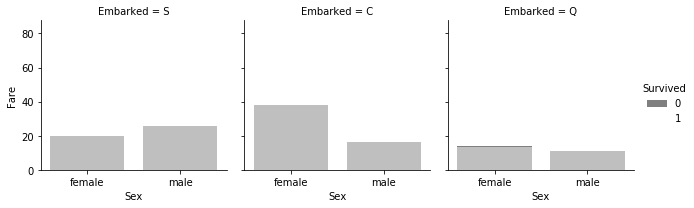

In [52]:
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [53]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


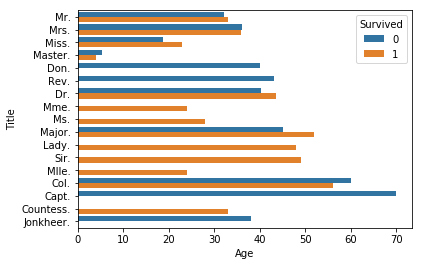

In [54]:
train_df['Title'] = train_df.Name.str.extract('(\w+\.)', expand=False)
sns.barplot(hue="Survived", x="Age", y="Title", data=train_df, ci=False)

In [55]:
test_df['Title'] = test_df.Name.str.extract('(\w+\.)', expand=False)

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
test_df.describe(include=['O'])

,Sex,Embarked,Title
count,418,418,418
unique,2,3,9
top,male,S,Mr.
freq,266,270,240


In [56]:
train_df['Gender'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.loc[:, ['Gender', 'Sex']].head()

,Gender,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [57]:
test_df['Gender'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df.loc[:, ['Gender', 'Sex']].head()

,Gender,Sex
0,0,male
1,1,female
2,0,male
3,0,male
4,1,female


In [58]:
train_df = train_df.drop(['Sex'], axis=1)
test_df = test_df.drop(['Sex'], axis=1)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,0,3,22.0,1,0,7.2500,S,Mr.,0
1,1,1,38.0,1,0,71.2833,C,Mrs.,1
2,1,3,26.0,0,0,7.9250,S,Miss.,1
3,1,1,35.0,1,0,53.1000,S,Mrs.,1
4,0,3,35.0,0,0,8.0500,S,Mr.,0


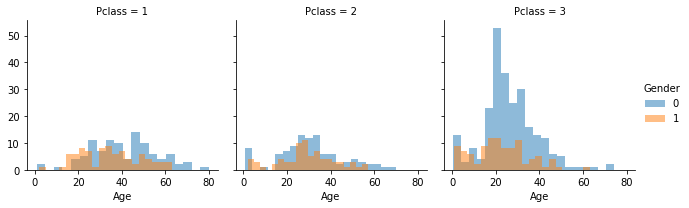

In [59]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [60]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [61]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = train_df[(train_df['Gender'] == i) & \
                              (train_df['Pclass'] == j+1)]['Age'].dropna()
        
        # Correlation of AgeFill is -0.014850
        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
        
        # Correlation of AgeFill is -0.011304
        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
        
guess_ages

array([[40. , 30. , 25. ],
       [35. , 28. , 21.5]])

In [62]:
train_df['AgeFill'] = train_df['Age']

for i in range(0, 2):
    for j in range(0, 3):
        train_df.loc[ (train_df.Age.isnull()) & (train_df.Gender == i) & (train_df.Pclass == j+1),\
                'AgeFill'] = guess_ages[i,j]

train_df[train_df['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,0,3,NaN,25.0
17,0,2,NaN,30.0
19,1,3,NaN,21.5
26,0,3,NaN,25.0
28,1,3,NaN,21.5
29,0,3,NaN,25.0
31,1,1,NaN,35.0
32,1,3,NaN,21.5
36,0,3,NaN,25.0
42,0,3,NaN,25.0


In [63]:
guess_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = test_df[(test_df['Gender'] == i) & \
                              (test_df['Pclass'] == j+1)]['Age'].dropna()

        # Correlation of AgeFill is -0.014850
        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        # Correlation of AgeFill is -0.011304
        age_guess = guess_df.median()

        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

test_df['AgeFill'] = test_df['Age']

for i in range(0, 2):
    for j in range(0, 3):
        test_df.loc[ (test_df.Age.isnull()) & (test_df.Gender == i) & (test_df.Pclass == j+1),\
                'AgeFill'] = guess_ages[i,j]

test_df[test_df['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
10,0,3,NaN,24.0
22,1,1,NaN,41.0
29,0,3,NaN,24.0
33,1,3,NaN,22.0
36,1,3,NaN,22.0
39,0,3,NaN,24.0
41,0,1,NaN,42.0
47,0,3,NaN,24.0
54,0,2,NaN,28.0
58,0,3,NaN,24.0


In [64]:
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Title,Gender,AgeFill
0,0,3,1,0,7.2500,S,Mr.,0,22.0
1,1,1,1,0,71.2833,C,Mrs.,1,38.0
2,1,3,0,0,7.9250,S,Miss.,1,26.0
3,1,1,1,0,53.1000,S,Mrs.,1,35.0
4,0,3,0,0,8.0500,S,Mr.,0,35.0


In [65]:
test_df['Age*Class'] = test_df.AgeFill * test_df.Pclass
train_df['Age*Class'] = train_df.AgeFill * train_df.Pclass
train_df.loc[:, ['Age*Class', 'AgeFill', 'Pclass']].head(10)

,Age*Class,AgeFill,Pclass
0,66.0,22.0,3
1,38.0,38.0,1
2,78.0,26.0,3
3,35.0,35.0,1
4,105.0,35.0,3
5,75.0,25.0,3
6,54.0,54.0,1
7,6.0,2.0,3
8,81.0,27.0,3
9,28.0,14.0,2


In [66]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [67]:
train_df['EmbarkedFill'] = train_df['Embarked']
train_df.loc[train_df['Embarked'].isnull(), 'EmbarkedFill'] = freq_port
train_df[train_df['Embarked'].isnull()][['Embarked','EmbarkedFill']].head(10)

,Embarked,EmbarkedFill
61,NaN,S
829,NaN,S


In [68]:
test_df['EmbarkedFill'] = test_df['Embarked']
train_df = train_df.drop(['Embarked'], axis=1)
test_df = test_df.drop(['Embarked'], axis=1)
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Title,Gender,AgeFill,Age*Class,EmbarkedFill
0,0,3,1,0,7.2500,Mr.,0,22.0,66.0,S
1,1,1,1,0,71.2833,Mrs.,1,38.0,38.0,C
2,1,3,0,0,7.9250,Miss.,1,26.0,78.0,S
3,1,1,1,0,53.1000,Mrs.,1,35.0,35.0,S
4,0,3,0,0,8.0500,Mr.,0,35.0,105.0,S


In [69]:
Ports = list(enumerate(np.unique(train_df['EmbarkedFill'])))
Ports_dict = { name : i for i, name in Ports }              
train_df['Port'] = train_df.EmbarkedFill.map( lambda x: Ports_dict[x]).astype(int)

Ports = list(enumerate(np.unique(test_df['EmbarkedFill'])))
Ports_dict = { name : i for i, name in Ports }
test_df['Port'] = test_df.EmbarkedFill.map( lambda x: Ports_dict[x]).astype(int)

train_df[['EmbarkedFill', 'Port']].head(10)

,EmbarkedFill,Port
0,S,2
1,C,0
2,S,2
3,S,2
4,S,2
5,Q,1
6,S,2
7,S,2
8,S,2
9,C,0


In [70]:
Titles = list(enumerate(np.unique(train_df['Title'])))
Titles_dict = { name : i for i, name in Titles }           
train_df['TitleBand'] = train_df.Title.map( lambda x: Titles_dict[x]).astype(int)

Titles = list(enumerate(np.unique(test_df['Title'])))
Titles_dict = { name : i for i, name in Titles }           
test_df['TitleBand'] = test_df.Title.map( lambda x: Titles_dict[x]).astype(int)

train_df[['Title', 'TitleBand']].head(10)

,Title,TitleBand
0,Mr.,12
1,Mrs.,13
2,Miss.,9
3,Mrs.,13
4,Mr.,12
5,Mr.,12
6,Mr.,12
7,Master.,8
8,Mrs.,13
9,Mrs.,13


In [71]:
train_df = train_df.drop(['EmbarkedFill', 'Title'], axis=1)
test_df = test_df.drop(['EmbarkedFill', 'Title'], axis=1)
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,Age*Class,Port,TitleBand
0,0,3,1,0,7.2500,0,22.0,66.0,2,12
1,1,1,1,0,71.2833,1,38.0,38.0,0,13
2,1,3,0,0,7.9250,1,26.0,78.0,2,9
3,1,1,1,0,53.1000,1,35.0,35.0,2,13
4,0,3,0,0,8.0500,0,35.0,105.0,2,12


In [73]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

train_df['Fare'] = train_df['Fare'].round(2)
test_df['Fare'] = test_df['Fare'].round(2)

test_df.head(10)

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill,Age*Class,Port,TitleBand
0,892,3,0,0,7.83,0,34.5,103.5,1,5
1,893,3,1,0,7.00,1,47.0,141.0,2,6
2,894,2,0,0,9.69,0,62.0,124.0,1,5
3,895,3,0,0,8.66,0,27.0,81.0,2,5
4,896,3,1,1,12.29,1,22.0,66.0,2,6
5,897,3,0,0,9.22,0,14.0,42.0,2,5
6,898,3,0,0,7.63,1,30.0,90.0,1,4
7,899,2,1,1,29.00,0,26.0,52.0,2,5
8,900,3,0,0,7.23,1,18.0,54.0,0,6
9,901,3,2,0,24.15,0,21.0,63.0,2,5


In [74]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [75]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.03

In [76]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Gender,2.603588
3,Fare,0.003058
8,TitleBand,-0.000970
5,AgeFill,-0.011226
6,Age*Class,-0.014132
2,Parch,-0.065878
7,Port,-0.138667
1,SibSp,-0.370618
0,Pclass,-0.630985


In [77]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

92.93

In [78]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [79]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.46

In [80]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


70.93

In [81]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

69.47

In [82]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


32.21

In [83]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [84]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

In [85]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
8,Decision Tree,98.20
0,Support Vector Machines,92.93
1,KNN,84.74
2,Logistic Regression,81.03
4,Naive Bayes,79.46
5,Perceptron,70.93
7,Linear SVC,69.47
6,Stochastic Gradient Decent,32.21


In [86]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)